Question 5 - 
Write a program to download the data from the given API link and then extract the following data with proper formatting
 Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes Note - Write proper code comments wherever needed for the code understanding 

Excepted Output Data Attributes - 
* id - int 
* url - string 
* name - string 
* season - int 
* number - int 
* type - string 
* airdate - date format 
* airtime - 12-hour time format 
* runtime - float 
* average rating - float 
* summary - string without html tags 
* medium image link - string 
* Original image link - string 


Sample Data

In [1]:
{
    "id": 2326658,
    "url": "https://www.tvmaze.com/episodes/2326658/westworld-4x05-zhuangzi",
    "name": "zhuangzi",
    "season": 4,
    "type": "regular",
    "airdate": "2022-07-24",
    "airtime": "21:00",
    "airstamp": "2022-07-25T01:00:00+00:00",
    "runtime": 60,
    "rating": {
        "average":7.8,
    },
    "image": {
        "medium": "https://statics.tvmaze.com/uploads/images/medium_landscape/416/1042460.jpg",
        "original": "https://statics.tvmaze.com/uploads/images/original_untouched/416/1042460.jpg"
    },
    "summary": "<p>God is bored.</p>",
    "_links": {
        "self": {
            "href": "https://api.tvmaze.com/episodes/2326658"
        }
    }
    
    
}

{'id': 2326658,
 'url': 'https://www.tvmaze.com/episodes/2326658/westworld-4x05-zhuangzi',
 'name': 'zhuangzi',
 'season': 4,
 'type': 'regular',
 'airdate': '2022-07-24',
 'airtime': '21:00',
 'airstamp': '2022-07-25T01:00:00+00:00',
 'runtime': 60,
 'rating': {'average': 7.8},
 'image': {'medium': 'https://statics.tvmaze.com/uploads/images/medium_landscape/416/1042460.jpg',
  'original': 'https://statics.tvmaze.com/uploads/images/original_untouched/416/1042460.jpg'},
 'summary': '<p>God is bored.</p>',
 '_links': {'self': {'href': 'https://api.tvmaze.com/episodes/2326658'}}}

In [1]:
import csv
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def download_data(url):
    response = requests.get(url)  # Send a GET request to the URL
    data = response.json()  # Convert the response to JSON format
    return data

# URL to download the data
url = r'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'

# Download the data from the URL
data = download_data(url)

In [2]:
data.keys()

dict_keys(['id', 'url', 'name', 'type', 'language', 'genres', 'status', 'runtime', 'averageRuntime', 'premiered', 'ended', 'officialSite', 'schedule', 'rating', 'weight', 'network', 'webChannel', 'dvdCountry', 'externals', 'image', 'summary', 'updated', '_links', '_embedded'])

To get to know the data better fetching each and every data point with every item , every keys and key type

In [4]:
for i in data.keys():
    print(f'Dictionary key "{i}" and item :',data[i],type(data[i]))
    print("")

Dictionary key "id" and item : 1371 <class 'int'>

Dictionary key "url" and item : https://www.tvmaze.com/shows/1371/westworld <class 'str'>

Dictionary key "name" and item : Westworld <class 'str'>

Dictionary key "type" and item : Scripted <class 'str'>

Dictionary key "language" and item : English <class 'str'>

Dictionary key "genres" and item : ['Drama', 'Science-Fiction', 'Western'] <class 'list'>

Dictionary key "status" and item : Ended <class 'str'>

Dictionary key "runtime" and item : 60 <class 'int'>

Dictionary key "averageRuntime" and item : 63 <class 'int'>

Dictionary key "premiered" and item : 2016-10-02 <class 'str'>

Dictionary key "ended" and item : 2022-08-14 <class 'str'>

Dictionary key "officialSite" and item : http://www.hbo.com/westworld <class 'str'>

Dictionary key "schedule" and item : {'time': '21:00', 'days': ['Sunday']} <class 'dict'>

Dictionary key "rating" and item : {'average': 8.2} <class 'dict'>

Dictionary key "weight" and item : 99 <class 'int'>



Finding 
* Data is about the series Westworld 

In [7]:
df = pd.DataFrame(data["_embedded"]['episodes'])
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,{'average': 7.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard suspects that someone is sabotaging...,{'self': {'href': 'https://api.tvmaze.com/epis...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While Dolores joins William and Logan on th...,{'self': {'href': 'https://api.tvmaze.com/epis...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...


In [8]:
df.shape

(36, 14)

In [11]:
print(f'Westworld series has {len(df.season.unique())} season') 

Westworld series has 4 season


In [12]:
#Creating updating feature rating from feature rating dict

In [13]:
for i in range(df.shape[0]):
    df['rating'].iloc[i]=df['rating'].iloc[i]['average']

C:\Users\RACHIT\AppData\Local\Temp\ipykernel_18384\1139208146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'].iloc[i]=df['rating'].iloc[i]['average']
C:\Users\RACHIT\AppData\Local\Temp\ipykernel_18384\1139208146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'].iloc[i]=df['rating'].iloc[i]['average']
C:\Users\RACHIT\AppData\Local\Temp\ipykernel_18384\1139208146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [14]:
for i in range(df.shape[0]):
    print(df['summary'].iloc[i])
    print("")

<p>A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.</p>

<p>Bernard suspects that someone is sabotaging the hosts. Meanwhile, the Man continues his search for the deeper game, and Maeve finds herself in a world of hurt... literally.</p>

<p>Bernard continues to investigate Dolores' supposed malfunction, and realizes that he has something unexpected on his hands. Meanwhile, Robert talks about the early days of the park, and Teddy receives a new role and narrative.</p>

<p>While Dolores joins William and Logan on their adventure, the Man in Black continues his search for the entrance to the Maze and meets Armistice. Meanwhile, Robert reveals some of his true power to Theresa and advises her to stay out of his way.</p>

<

There are some html tag in string so need to remove that tag

In [16]:
for i in range(df.shape[0]):
    df['summary'].iloc[i]=df['summary'].iloc[i].replace('<p>','')#remove "<p>" from summary
    df['summary'].iloc[i]=df['summary'].iloc[i].replace('</p>','')#remove "<p>" from summary

C:\Users\RACHIT\AppData\Local\Temp\ipykernel_18384\1696725144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['summary'].iloc[i]=df['summary'].iloc[i].replace('<p>','')#remove "<p>" from summary
C:\Users\RACHIT\AppData\Local\Temp\ipykernel_18384\1696725144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['summary'].iloc[i]=df['summary'].iloc[i].replace('</p>','')#remove "<p>" from summary
C:\Users\RACHIT\AppData\Local\Temp\ipykernel_18384\1696725144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [17]:
for i in range(df.shape[0]):
    print(df['summary'].iloc[i])
    print("")

A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.

Bernard suspects that someone is sabotaging the hosts. Meanwhile, the Man continues his search for the deeper game, and Maeve finds herself in a world of hurt... literally.

Bernard continues to investigate Dolores' supposed malfunction, and realizes that he has something unexpected on his hands. Meanwhile, Robert talks about the early days of the park, and Teddy receives a new role and narrative.

While Dolores joins William and Logan on their adventure, the Man in Black continues his search for the entrance to the Maze and meets Armistice. Meanwhile, Robert reveals some of his true power to Theresa and advises her to stay out of his way.

Dolores takes the first step 

Html tag has remove 

In [18]:
df['image'][0]

{'medium': 'https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg',
 'original': 'https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg'}

In [19]:
#creating two new feature medium and original from feature image 
df['medium'] = ''
df['original'] = ''
for i in range(df.shape[0]):
    df['medium'].iloc[i] = df['image'].iloc[i]['medium']
    df['original'].iloc[i] = df['image'].iloc[i]['original']
    

C:\Users\RACHIT\AppData\Local\Temp\ipykernel_18384\2729275001.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['medium'].iloc[i] = df['image'].iloc[i]['medium']
C:\Users\RACHIT\AppData\Local\Temp\ipykernel_18384\2729275001.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['original'].iloc[i] = df['image'].iloc[i]['original']
C:\Users\RACHIT\AppData\Local\Temp\ipykernel_18384\2729275001.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [40]:
df['airtime'] = pd.to_datetime(df['airtime'], format='%I:%M %p')
df['airtime'] = df['airtime'].dt.strftime('%I:%M %p')
df['airdate'] = pd.to_datetime(df['airdate'])
df['airdate'] = df['airdate'].dt.strftime('%Y-%m-%d')

In [41]:
#Changing dtype of features 
df['runtime'] = df['runtime'].astype("float")
df['rating'] = df['rating'].astype("float")
df['medium'] = df['medium'].astype("str")
df['original'] = df['original'].astype("str")

In [42]:
print('id')
print("Required dtype-int")
series_id = df['id']
print(series_id.dtype)
print(series_id[0])
print("")

print('url')
print("Required dtype-String")
series_url=df['url']
print(series_url.dtype)
print(series_url[0])
print("")

print('name')
print("Required dtype-String")
series_name = df['name']
print(series_name.dtype)
print(series_name[0])
print("")



print('season')
print("Required dtype-int")
series_season=df['season']
print(series_season.dtype)
print(series_season[0])
print("")

print('number')
print("Required dtype-int")
series_number=df['number']
print(series_number.dtype)
print(series_number[0])
print("")

print("type")
print("Required dtype-string")
series_type = df["type"]
print(series_type.dtype)
print(series_type[0])
print("")


print("airdate")
print("Required dtype-date format")
series_airdate = df["airdate"]
print(series_airdate.dtype)
print(series_airdate[0])
print("")

print("airtime")
print("Required dtype-12-hour time format")
series_airtime= df["airtime"]
print(series_airtime.dtype)
print(series_airtime[0])
print("")

print("runtime")
print("Required dtype-float")
series_runtime = df["runtime"]
print(series_runtime.dtype)
print(series_runtime[0])
print("")

print("rating")
print("Required dtype-float")
series_rating = df["rating"]
print(series_rating.dtype)
print(series_rating[0])
print("")

print("image")
print("Required dtype-string")
series_image = df["image"]
print(series_image.dtype)
print(series_image[0])
print("")

print("medium")
print("Required dtype-string")
series_medium = df["medium"]
print(series_medium.dtype)
print(series_medium[0])
print("")

print("original")
print("Required dtype-string")
series_original = df["original"]
print(series_original.dtype)
print(series_original[0])
print("")

print("summary")
print("Required dtype-string without html tags")
series_summary = df["summary"]
print(series_summary.dtype)
print(series_summary[0])
print("")

print("_links")
print("Required dtype-list of int")
series_links = df["_links"]
print(series_links.dtype)
print(series_links[0])
print("")

id
Required dtype-int
int64
869671

url
Required dtype-String
object
https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original

name
Required dtype-String
object
The Original

season
Required dtype-int
int64
1

number
Required dtype-int
int64
1

type
Required dtype-string
object
regular

airdate
Required dtype-date format
object
2016-10-02

airtime
Required dtype-12-hour time format
object
09:00 PM

runtime
Required dtype-float
float64
68.0

rating
Required dtype-float
float64
8.0

image
Required dtype-string
object
{'medium': 'https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg', 'original': 'https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg'}

medium
Required dtype-string
object
https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg

original
Required dtype-string
object
https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg

summary
Required dtype-string without html tags
object
A woman named Do

Question 8 - 
Using the data from Question 5, write code the analyze the data and answer the following questions 
Note - 1. Draw plots to demonstrate the analysis for the following questions and better visualizations 
2. Write code comments wherever required for code understanding 
Insights to be drawn - 
* Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on. 
* Get all the episode names, whose average rating is more than 8 for every season 
* Get all the episode names that aired before May 2019 
* Get the episode name from each season with the highest and lowest rating 
* Get the summary for the most popular ( ratings ) episode in every season

In [43]:
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links,medium,original
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,2016-10-03T01:00:00+00:00,68.0,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,A woman named Dolores is a free spirit in the ...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,2016-10-10T01:00:00+00:00,60.0,7.7,{'medium': 'https://static.tvmaze.com/uploads/...,Bernard suspects that someone is sabotaging th...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,2016-10-17T01:00:00+00:00,60.0,7.6,{'medium': 'https://static.tvmaze.com/uploads/...,Bernard continues to investigate Dolores' supp...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,2016-10-24T01:00:00+00:00,60.0,7.9,{'medium': 'https://static.tvmaze.com/uploads/...,While Dolores joins William and Logan on their...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,2016-10-31T01:00:00+00:00,60.0,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,Dolores takes the first step on her path of di...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

C:\Users\RACHIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='rating'>

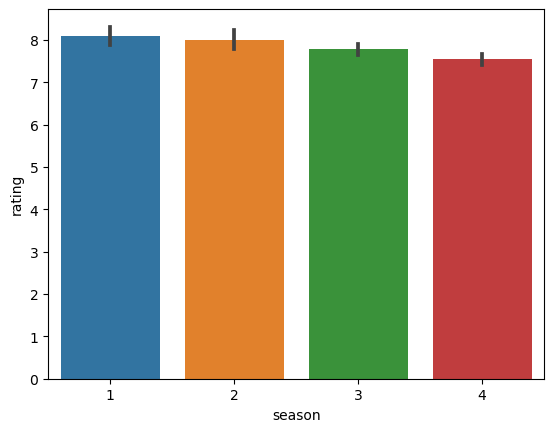

In [78]:
sns.barplot(df['season'],df['rating'])

In [79]:
sns.pieplot(df['season'],df['rating'])

AttributeError: module 'seaborn' has no attribute 'pieplot'

Get all the episode names, whose average rating is more than 8 for every season

In [75]:
df[df['rating']>8.0][['name','season']]

,name,season
6,Trompe L'Oeil,1
8,The Well-Tempered Clavier,1
9,The Bicameral Mind,1
17,Kiksuya,2
18,Vanishing Point,2
19,The Passenger,2


Get all the episode names that aired before May 2019

In [69]:
# Filter the episode names based on the airing date
df[df['airdate'] < '2019-05-01']['name']

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

Get the episode name from each season with the highest and lowest rating

In [148]:
# Find the episode with the highest rating for each season
max_ratings = df.groupby('season')['rating'].max()
max_episodes = df[df.groupby('season')['rating'].transform(max_ratings.eq)]

# Find the episode with the lowest rating for each season
min_ratings = df.groupby('season')['rating'].min()
min_episodes = df[df.groupby('season')['rating'].transform(min_ratings.eq)]

# Print the episode names with highest and lowest ratings for each season
for season in df['season'].unique():
    try:
        max_rating_episode = max_episodes[max_episodes['season'] == season]['name'].values[0]
        min_rating_episode = min_episodes[min_episodes['season'] == season]['name'].values[0]
        print(f"Season {season}: Highest Rating: {max_rating_episode}, Lowest Rating: {min_rating_episode}")
    except:
        print("Something went wrong")

Something went wrong
Something went wrong
Something went wrong
Something went wrong


Get the summary for the most popular ( ratings ) episode in every season

In [67]:
#We need to find maximum rating in each season
max_ratings = df.groupby('season')['rating'].idxmax()

# Print the summary for the most popular episode in each season
for i in max_ratings:
    print(f"Season {df['season'].iloc[i]}, Episode: {df['name'].iloc[i]}")
    print(f"Rating: {df['rating'].iloc[i]}")
    print(f"Summary: {df['summary'].iloc[i]}")
    print("")
    

Season 1, Episode: The Bicameral Mind
Rating: 8.7
Summary: Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.

Season 2, Episode: Kiksuya
Rating: 8.7
Summary: Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.

Season 3, Episode: Parce Domine
Rating: 8.0
Summary: If you're stuck in a loop, try walking in a straight line.

Season 4, Episode: Zhuangzi
Rating: 7.8
Summary: God is bored.

